# Test polygons

In [ ]:
using Plots
using Revise

In [2]:
Revise.includet("../src/point_in_polygon.jl");
Revise.includet("../src/moments.jl");

In [4]:
H_polygon = [(2, 10), (4, 10), (4, 6), (6, 6), (6, 10), (8, 10), (8, 1), (6, 1), (6, 4), (4, 4), (4, 1), (2, 1)]
L_polygon = [(2, 10), (4, 10), (4, 3), (7, 3), (7, 1), (2, 1)]
rectangle = [(2, 9), (8, 9), (8, 2), (2, 2)]
pentagon = [(1, 7), (5, 10), (9, 7), (7, 2), (3, 2)]
scew_H = [(2, 10), (4, 10), (4, 6), (6, 6), (6, 10), (8, 10), (8, 1), (6, 1), (6, 4), (4, 4), (4, 2), (2, 2)]
fish = [(2, 5), (5, 8), (8, 3), (8, 8), (6, 3), (3, 3)]

polygons = [H_polygon, L_polygon, rectangle, pentagon, scew_H, fish];

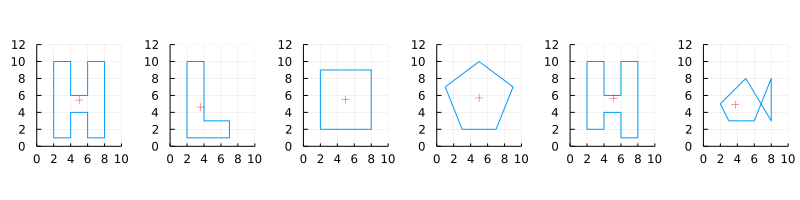

In [5]:
frames = []
for polygon in polygons
    x = [point[1] for point in polygon]
    y = [point[2] for point in polygon]
    push!(x, x[1])
    push!(y, y[1])
    frame = plot(x, y, aspectratio=1, ylims=(0, 12), xlims=(0,10), label="")

    centroid = centroid_polygon(polygon)
    plot!(frame, [centroid[1]], [centroid[2]], markershape=:cross, color=:red, label="")

    push!(frames, frame)
end

plot(frames..., layout = (1, length(polygons)), size=(800, 200))

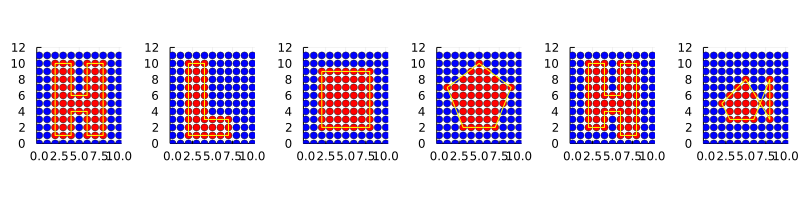

In [21]:
frames = []
for polygon in polygons
    inside = []
    points = []
    for x in 0:10
        for y in 0:11
            push!(inside, point_in_polygon((x, y), polygon))
            push!(points, (x, y))
        end
    end
    
    x = [point[1] for point in points]
    y = [point[2] for point in points]
    color = [is_inside ? "red" : "blue" for is_inside in inside]
    frame = scatter(x, y, color=color, label="")
    x = [point[1] for point in polygon]
    y = [point[2] for point in polygon]
    plot!(frame, vcat(x, x[1]), vcat(y, y[1]), aspectratio=1, label="", color=:yellow, ylims=(0, 12))
    push!(frames, frame)
end
plot(frames..., layout = (1, length(polygons)), size=(800, 200))